<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://fra.utn.edu.ar/">
<image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/assets_python/logoUTN-500.svg"  width="100">
</a></td>
<td style="border:none;"><font face="times" size=4>Física 2<br>2024<br>Electromagnetismo<br>Material para trabajo en clase</font>
</td>
</tr>
</table> 

</br>

<table>
<tr style="border:none;">
<td style="border:none;"><a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es"><image src="https://raw.githubusercontent.com/frautn/F2-electromagnetismo/main/docs/assets/img/by-nc-sa.svg" width="70" /></a></td>
<td style="border:none;"><font face="times" size=4>2024 Edgardo Palazzo (epalazzo@fra.utn.edu.ar)</font>
</td>
</tr>
</table>

# Distribuciones de carga contínuas

**Parte 2**

En este cuaderno se utiliza la librería _SimPy_ para calcular las integrales necesarias en la obtención de campos eléctricos de cargas extensas.

---

**Objetivos**

- Aprovechar la capacidad de realizar cálculos simbólicos en _Python_ para calcular integrales múltiples que demandarían demasiado tiempo si se realizaran en pizarrón o en papel. 

**Tabla de contenidos**<a id='toc0_'></a>    
- 1. [Campo eléctrico de distribuciones de carga contínuas](#toc1_)    
- 2. [Segmento de línea](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

np.seterr(divide='ignore')  # Elimina advertencia al dividir por cero.
%precision %.3f

!pip install --index-url https://test.pypi.org/simple/ --no-deps frautnEM
# from frautnEM.puntuales import plotEfcontribuciones, plotEfVector, equipotencialesPuntuales
# from frautnEM.puntuales import plotEfVectorHilo

import importlib
# import sympy as sym
# Necesario para que pylance ande bien con sympy:
sym = importlib.import_module('sympy')
sym.init_printing(use_unicode=False, wrap_line=False)

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip --quiet install ipympl
  from google.colab import output
  output.enable_custom_widget_manager()

# Figuras interactivas.
# Comentar si se quiere mantener las figuras luego de cerrar el cuaderno.
# %matplotlib widget


Looking in indexes: https://test.pypi.org/simple/


## 1. <a id='toc1_'></a>[Campo eléctrico de distribuciones de carga contínuas](#toc0_)

En el cuaderno [em03_distribuciones_continuas.ipynb](em03_distribuciones_continuas.ipynb) se interpretaron a las distribuciones contínuas como una suma de muchas cargas puntuales, y comprobamos que aumentando el número de cargas la aproximación mejora. Si se aumenta el número de cargas hasta el infinito, se pasa de la sumatoria
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \sum_{i=1}^N \frac{q_i}{|\vec{\text{r}}_i|^3} \vec{\text{r}}_i \tag{1}
$$

a un cálculo integral, sobre cargas infinitesimales.  

Si la carga está distribuida en una línea, cada carga infinitesimal vale $\lambda(\vec{\text{x}}') dl$, siendo $\lambda(\vec{\text{x}}')$ el valor de la densidad lineal de carga en la posición $\vec{\text{x}}'$, que es un punto perteneciente a la línea de carga. La integral en este caso resulta
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \int_C \frac{(x - x')\hat{i} + (y - y')\hat{j} + (z - z')\hat{k}}{((x-x')^2+(y-y')^2+(z-z')^2)^{3/2}} \lambda(\vec{\text{x}}') dl  ~ , \tag{2}
$$
que es una integral curvilínea donde las variables de integración son las coordenadas $x'$, $y'$ y $z'$ de los puntos que forman la curva $C$. 

Si la carga está distribuida en una superficie, cada carga infinitesimal vale $\sigma(\vec{\text{x}}') dS$, siendo $\sigma(\vec{\text{x}}')$ el valor de la densidad superficial de carga en la posición $\vec{\text{x}}'$, que es un punto perteneciente a la superficie cargada. La integral en este caso es la siguiente integral doble sobre la superficie cargada $S$:
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \iint_S \frac{(x - x')\hat{i} + (y - y')\hat{j} + (z - z')\hat{k}}{((x-x')^2+(y-y')^2+(z-z')^2)^{3/2}} \sigma(\vec{\text{x}}') dS  ~ . \tag{3}
$$

Y si la carga está distribuida en un volumen, cada carga infinitesimal vale $\rho(\vec{\text{x}}') dV$, siendo $\rho(\vec{\text{x}}')$ el valor de la densidad volumétrica de carga en la posición $\vec{\text{x}}'$, que es un punto perteneciente al volumen cargado. La integral en este caso es la siguiente integral triple sobre el volumen cargado $V$:
$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \iiint_V \frac{(x - x')\hat{i} + (y - y')\hat{j} + (z - z')\hat{k}}{((x-x')^2+(y-y')^2+(z-z')^2)^{3/2}} \rho(\vec{\text{x}}') dV  ~ . \tag{4}
$$

## 2. <a id='toc2_'></a>[Segmento de línea](#toc0_)

Para el caso del segmento sobre el eje $x$, el diferencial de longitud es $dl = dx$. Por lo tanto, si el segmento se desarrolla desde $x = a$ hasta $x = b$, según la ecuación 2, el campo que genera se calcula como:

$$
\vec{E}(\vec{\text{x}}) = \frac{1}{4\pi\varepsilon_0} \int_a^b \frac{(x - x')\hat{i} + y\hat{j} + z\hat{k}}{((x-x')^2+y^2+z^2)^{3/2}} \lambda(x') dx'  ~ . \tag{5}
$$


A continuación este cálculo en Python:

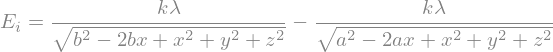

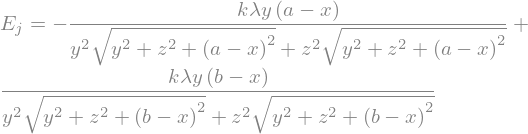

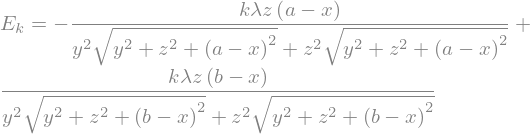

In [2]:
# X: variable de integración.
# El resultado de la integral depende de la zona donde ubicamos el punto campo.
# En este caso resolvemos solo para y>0 y z>0.
k,l,x,X,a,b = sym.symbols('k lambda x X a b')
y = sym.symbols('y', positive=True)
z = sym.symbols('z', positive=True)

Ei = sym.Eq(
  sym.Symbol('E_{i}'),
  sym.integrate(k*l*(x-X)/(sym.sqrt((x-X)**2+y**2+z**2))**3,(X,a,b))
)
Ej = sym.Eq(
  sym.Symbol('E_{j}'),
  sym.integrate(k*l*y/(sym.sqrt((x-X)**2+y**2+z**2))**3,(X,a,b))
)
Ek = sym.Eq(
  sym.Symbol('E_{k}'),
  sym.integrate(k*l*z/(sym.sqrt((x-X)**2+y**2+z**2))**3,(X,a,b))
)

display(Ei)
display(Ej)
display(Ek)

Podemos usar estas expresiones para obtener las componentes de $E$ reemplazando los valores de $\lambda$, $a$, $b$ y $k$ (se podría agregar un medio dieléctrico aquí, calculando el valor de $k$ para el correspondiente $\varepsilon_R$). Utilicemos los mismos valores que en la sección 2.1 del cuaderno [em03_distribuciones_continuas.ipynb](em03_distribuciones_continuas.ipynb): longitud $L = 20\text{ cm}$, desde $x = -10\text{ cm}$ hasta $x = 10\text{ cm}$, con densidad uniforme $\lambda = 5\text{ nC/m}$.

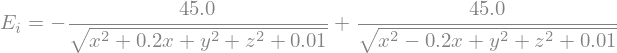

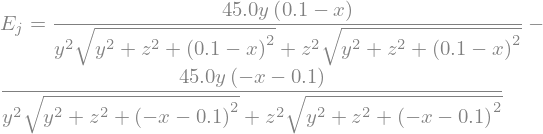

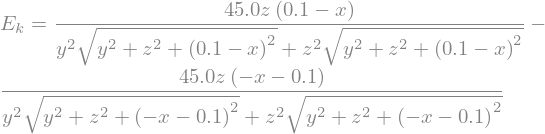

In [3]:
Eii = Ei.subs([(k, 9E9), (l, 5E-9), (a, -0.1), (b, 0.1)])
Ejj = Ej.subs([(k, 9E9), (l, 5E-9), (a, -0.1), (b, 0.1)])
Ekk = Ek.subs([(k, 9E9), (l, 5E-9), (a, -0.1), (b, 0.1)])
display(Eii)
display(Ejj)
display(Ekk)

Y ahora podemos evaluar en la posición que nos interese. Recordar que estos resultados son válidos fuera del eje $x$, con $y>0$ y $z>0$.

In [4]:
display(

    Eii.subs([(x,0), (y,0.1), (z,0)]),
    Ejj.subs([(x,0), (y,0.1), (z,0)]),
    Ekk.subs([(x,0), (y,0.1), (z,0)]),

    )